# 10 - Final compare 
## (see subfolders for more detailed plots)

In [5]:
import csv
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
%cd proseminar/10/

[Errno 2] No such file or directory: 'proseminar/10/'
/Users/chris/git/uni/uibk_parsys_19_solutions/proseminar/10


### Prepare data

In [6]:
def getDataFor(path):
    with open(path) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=';')
        return [[int(row[0]),int(row[1]), int(row[2]), float(row[3])] for row in csv_reader]

def sort(data):
    fData={}
    for elem in data:
        t = {"slots" : elem[0], "threads" : elem[1], "t" : elem[3]}
        if not elem[2] in fData:
            fData[elem[2]] = [t]
        else:
            fData.get(elem[2]).append(t)
    return fData

problemSizes = [100,200,400,800,1600]
heat_stencil_data = sort(getDataFor('heat_stencil_2d/output.dat'))
mpi_optimized_stencil_data = sort(getDataFor('mpi_optimized_heat_stencil_2d/output.dat'))
omp_optimized_stencil_data = sort(getDataFor('omp_optimized_heat_stencil_2d/output.dat'))
mpi_omp_optimized_stencil_data = sort(getDataFor('mpi_omp_optimized_heat_stencil_2d/output.dat'))

### Speedup
- absolut: reference ts is the fastest sequential version
- relativ: reference ts is the fastest parallel version run sequentially
$$ speedup_p = \frac{t_s}{t_p} $$

### Efficency
$$ efficency = \frac{speedup_p}{p} $$

### Fixed number of threads, increasing number of slots with two different problem sizes

([<matplotlib.axis.XTick at 0x7f90d9168610>,
 <a list of 3 Text xticklabel objects>)

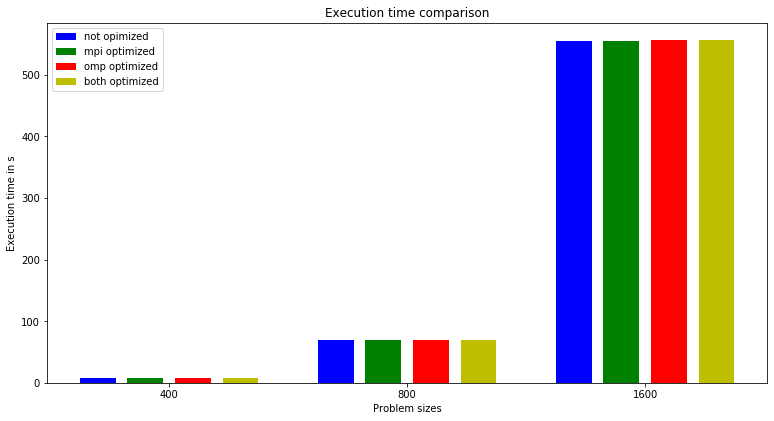

In [59]:
plt.rcParams["figure.figsize"] = (10,5)

def prepareData(data, problemSize):
    data = data[problemSize]
    reference = data[0]["t"]
    similar = [d for d in data if d["slots"] == d["threads"]]
    def prepareData(data):
        operations = [d["threads"] * d["slots"] for d in data]
        speedup = [reference/d["t"] for d in data]
        efficency = [speedup[i] / operations[i] for i in range(0,len(operations))]
        execTime = [d["t"] for d in data]
        return{"operations":operations, "speedup":speedup, "efficency":efficency, "execTime":execTime, "problemSize":problemSize}
    return {"data":prepareData(similar), "problemSize":problemSize}




final_heat_stencil_data = {problemSize:prepareData(heat_stencil_data, problemSize) for problemSize in problemSizes}
final_mpi_optimized_stencil_data = {problemSize:prepareData(mpi_optimized_stencil_data, problemSize) for problemSize in problemSizes}
final_omp_optimized_stencil_data = {problemSize:prepareData(omp_optimized_stencil_data, problemSize) for problemSize in problemSizes}
final_mpi_omp_optimized_stencil_data = {problemSize:prepareData(mpi_omp_optimized_stencil_data, problemSize) for problemSize in problemSizes}

problemSizes = [400,800,1600]

d = [
    [ final_heat_stencil_data[pSize]["data"]["execTime"][0] for pSize in problemSizes ],
    [ final_mpi_optimized_stencil_data[pSize]["data"]["execTime"][0] for pSize in problemSizes ],
    [ final_omp_optimized_stencil_data[pSize]["data"]["execTime"][0] for pSize in problemSizes ],
    [ final_mpi_omp_optimized_stencil_data[pSize]["data"]["execTime"][0] for pSize in problemSizes ]
]

X = np.arange(len(problemSizes))
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X - 0.3, d[0], color = 'b', width = 0.15)
ax.bar(X - 0.1, d[1], color = 'g', width = 0.15)
ax.bar(X + 0.1, d[2], color = 'r', width = 0.15)
ax.bar(X + 0.3, d[2], color = 'y', width = 0.15)

ax.set_title('Execution time comparison')
ax.set_ylabel('Execution time in s')
ax.set_xlabel('Problem sizes')
ax.legend(labels=['not opimized', 'mpi optimized', 'omp optimized', 'both optimized'])
plt.xticks(X, problemSizes)